Learning problems, in general, are concerning in find properties of unknow data from a colection of of $n$ samples of multivariate data.  

There are few categories of learning:
 
 - supervised learning: the data have an target together of its properties, i.e., features
     - classification: the desirable output is one or more classes in a set of possible classes  
     - regression: the desirable output is one or more continuous variables
 - unsupervised learning: set of input vectors without targets
     The goal is to find groups of similar examples (clustering), or determine probability distribution (density estimation) or project data from high-dimensional space down to two or three dimensions (visualization)
 

A commom pratice in machine learning is to learn properties of a group of data and apply it to another group. For this reason, we split the data into train and tes sets.
The train set is used to learn some properties and the test set is used to evaluate the learned properties.

### Loading a dataset

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


The data is a 2D array, shape (n_samples, n_features)

### Learning and predicting

In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)             # Model to classify data, gamma and C are parameters
clf.fit(digits.data[:-1], digits.target[:-1])  # Add data to train model

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf.predict(digits.data[-1:])                  # Predicting new data 

array([8])

You can visualize this image to verify the classification accuracy

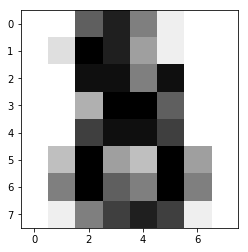

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 

### Model persistence

Since you train your model, you want to save it to use in new data. It is interesting to use joblib to save your models, it is more efficient on big data, saving into the disk.

In [8]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.joblib') 

# After you can reload your model
clf = joblib.load('filename.joblib') 

### Multiclass $\times$ multilabel

The task performed is dependent on the format of target

In [9]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(gamma='auto',     # 'auto' will be 'scale' in 0.22 version of sklearn
                                            random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

It can be binarized for multiclass indicators. Only one class for each feature vector.

In [10]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

Multilabel instances classification assigns one or more classes for each feature vector.

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

## Supervised learning

Example of a dataset for classification task is the iris dataset. It is composed by data from 3 different irises (Setosa, Versicolour, and Virginica). The properties of each example are petal and sepal length and width.

In [12]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

### KNN (k-nearest neighbors)

Find, for a new observation $X_{test}$, the $k$ closest observations in train set. The $X_{test}$ observation is classified as being of the same class of the majoritary class between de $k$ closest observations.

In [13]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 



knn.predict(iris_X_test)

iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])